In [7]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

def pairwise(ls): return (zip(ls,ls[1:]))
def mapKey(ls): return lambda key : [x.get(key,None) for x in ls]
def table(data): return pd.DataFrame(data).style
replace = lambda targ, newval: lambda arr: [newval if d == targ else d for d in arr]

In [8]:
height = 1.80
data = [
    {"date": "2020-02-29", "weight": 103.6, "muscle": 71.3, "p_fat": 27.6, "visceral_fat": 9.5, "waistline": 114 },
    {"date": "2020-03-07", "weight": 102.2, "muscle": 69.2, "p_fat": 28.8, "visceral_fat": 10 , "waistline": 113 },
    {"date": "2020-03-14", "weight": 102.3, "muscle": 73.2, "p_fat": 24.7, "visceral_fat": 8  , "waistline": 112 },
    {"date": "2020-03-22", "weight": 100.8, "muscle": 70.0, "p_fat": 27.0, "visceral_fat": 9  , "waistline": 109 },
    {"date": "2020-03-27", "weight":  99.8, "muscle": 69.5, "p_fat": 26.8, "visceral_fat": 8.5, "waistline": 107, "chest": 109 },
    {"date": "2020-04-04", "weight":  99.3, "muscle": 69.3, "p_fat": 26.6, "visceral_fat": 8.5, "waistline": 105, "chest": 107 },
    {"date": "2020-04-11", "weight":  98.6, "muscle": 70.0, "p_fat": 25.3, "visceral_fat": 8  , "waistline": 103, "chest": 106 },
    {"date": "2020-04-18", "weight":  98.2, "muscle": 70.8, "p_fat": 24.2, "visceral_fat": 7.5, "waistline": 105, "chest": 106 },
    {"date": "2020-04-25", "weight":  97.4, "muscle": 69.0, "p_fat": 25.5, "visceral_fat": 8  , "waistline": 103, "chest": 105 },
    {"date": "2020-05-01", "weight":  97.2, "muscle": 68.7, "p_fat": 25.6, "visceral_fat": 8  , "waistline": 101, "chest": 105 },
    {"date": "2020-05-09", "weight":  97.7, "muscle": 71.0, "p_fat": 23.5, "visceral_fat": 7  , "waistline":  99, "chest": 104 },
    {"date": "2020-05-16", "weight":  97.0, "muscle": 70.2, "p_fat": 23.9, "visceral_fat": 7.5, "waistline": 100, "chest": 103 },
    {"date": "2020-05-23", "weight":  97.9, "muscle": 72.4, "p_fat": 22.3, "visceral_fat": 6.5, "waistline": 101, "chest": 104 }, 
    {"date": "2020-05-30", "weight":  96.7, "muscle": 70.5, "p_fat": 23.3, "visceral_fat": 7  , "waistline": 100, "chest": 103 },
    {"date": "2020-06-06", "weight":  96.1, "muscle": 70.3, "p_fat": 23.1, "visceral_fat": 7  , "waistline": 102, "chest": 103 }, 


]

## Some computations

Add some values

In [9]:
for d in data: 
    d["fat"]  = round(d["p_fat"] / 100 * d["weight"], 1)
    d["BMI"]  = round(d["weight"] / height / height, 2)
    #d["date"] = datetime.strptime(d["date"], "%Y-%m-%d")

table(data)

,date,weight,muscle,p_fat,visceral_fat,waistline,fat,BMI,chest
0,2020-02-29,103.600000,71.300000,27.600000,9.500000,114,28.600000,31.980000,nan
1,2020-03-07,102.200000,69.200000,28.800000,10.000000,113,29.400000,31.540000,nan
2,2020-03-14,102.300000,73.200000,24.700000,8.000000,112,25.300000,31.570000,nan
3,2020-03-22,100.800000,70.000000,27.000000,9.000000,109,27.200000,31.110000,nan
4,2020-03-27,99.800000,69.500000,26.800000,8.500000,107,26.700000,30.800000,109.000000
5,2020-04-04,99.300000,69.300000,26.600000,8.500000,105,26.400000,30.650000,107.000000
6,2020-04-11,98.600000,70.000000,25.300000,8.000000,103,24.900000,30.430000,106.000000
7,2020-04-18,98.200000,70.800000,24.200000,7.500000,105,23.800000,30.310000,106.000000
8,2020-04-25,97.400000,69.000000,25.500000,8.000000,103,24.800000,30.060000,105.000000
9,2020-05-01,97.200000,68.700000,25.600000,8.000000,101,24.900000,30.000000,105.000000


Add deltas

In [10]:
def computeDeltas(_data):
    _deltas = []
    for (prev,curr) in pairwise(_data): 
        dd = {
            "date": curr["date"], 
            "prev": prev["date"]
        }
        
        for k in ["weight", "muscle", "fat", "waistline","BMI", "chest", "visceral_fat"]:
            if k in curr.keys() and k in prev.keys():
                dd["d_"+k] = round(curr[k] - prev[k],2) 
        
        _deltas.append(dd)
    return _deltas

deltas = computeDeltas(data)
pd.DataFrame(deltas).style

,date,prev,d_weight,d_muscle,d_fat,d_waistline,d_BMI,d_visceral_fat,d_chest
0,2020-03-07,2020-02-29,-1.400000,-2.100000,0.800000,-1,-0.440000,0.500000,nan
1,2020-03-14,2020-03-07,0.100000,4.000000,-4.100000,-1,0.030000,-2.000000,nan
2,2020-03-22,2020-03-14,-1.500000,-3.200000,1.900000,-3,-0.460000,1.000000,nan
3,2020-03-27,2020-03-22,-1.000000,-0.500000,-0.500000,-2,-0.310000,-0.500000,nan
4,2020-04-04,2020-03-27,-0.500000,-0.200000,-0.300000,-2,-0.150000,0.000000,-2.000000
5,2020-04-11,2020-04-04,-0.700000,0.700000,-1.500000,-2,-0.220000,-0.500000,-1.000000
6,2020-04-18,2020-04-11,-0.400000,0.800000,-1.100000,2,-0.120000,-0.500000,0.000000
7,2020-04-25,2020-04-18,-0.800000,-1.800000,1.000000,-2,-0.250000,0.500000,-1.000000
8,2020-05-01,2020-04-25,-0.200000,-0.300000,0.100000,-2,-0.060000,0.000000,0.000000
9,2020-05-09,2020-05-01,0.500000,2.300000,-1.900000,-2,0.150000,-1.000000,-1.000000


Total

In [11]:
table(computeDeltas([data[0],data[-1]]))

,date,prev,d_weight,d_muscle,d_fat,d_waistline,d_BMI,d_visceral_fat
0,2020-06-06,2020-02-29,-7.500000,-1.000000,-6.400000,-12,-2.320000,-2.500000


## Plots

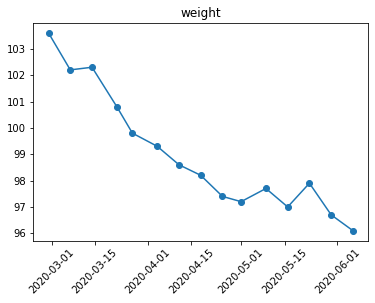

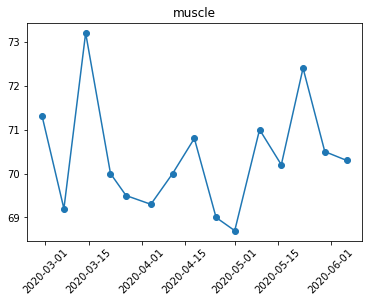

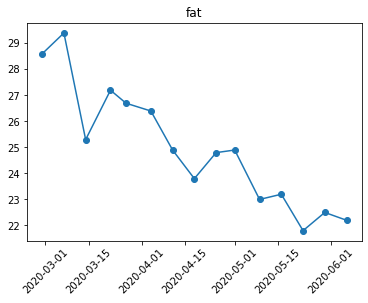

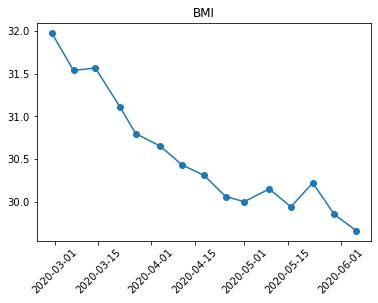

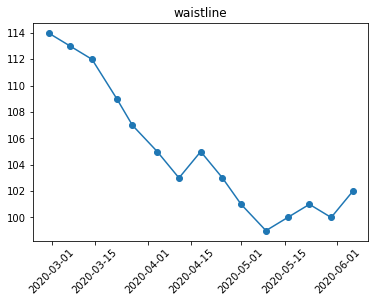

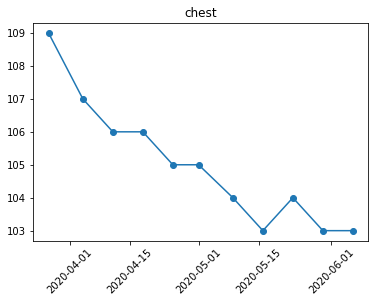

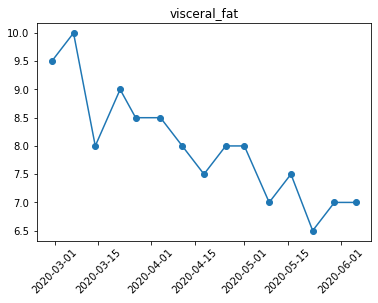

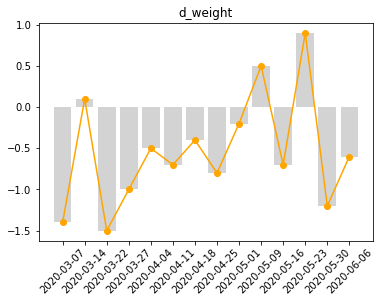

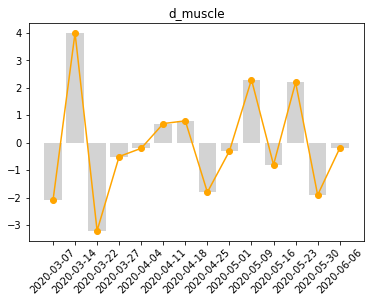

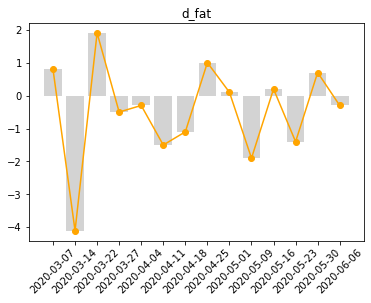

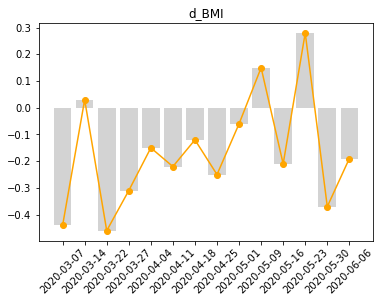

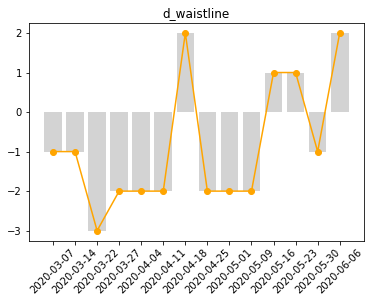

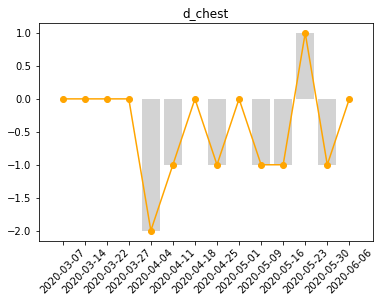

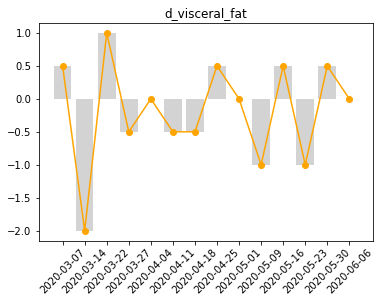

In [12]:
dataKey = lambda key: mapKey(data)(key) if key != "date" else [datetime.strptime(d, "%Y-%m-%d") for d in mapKey(data)(key)]
replaceNone = replace(None,0)

keys = ["weight", "muscle","fat","BMI", "waistline","chest", "visceral_fat"]
for k in keys:
    plt.plot(dataKey("date"),dataKey(k),"o-")
    plt.title(k)
    plt.xticks(rotation=45)
    plt.show()


deltasKey = mapKey(deltas)
keys = ["d_weight", "d_muscle","d_fat","d_BMI","d_waistline", "d_chest", "d_visceral_fat"]
for k in keys:
    plt.bar(deltasKey("date"),replaceNone(deltasKey(k)), color="lightgrey")
    plt.plot(deltasKey("date"),replaceNone(deltasKey(k)), "o-", color="orange")
    plt.title(k)
    plt.xticks(rotation=45)
    plt.show()
